# What is DASK UI?

Dask UI is a web-based user interface that provides visualizations and diagnostic information for Dask distributed computing workflows. Dask UI helps us to better understand and optimize the Dask workflows.

In [1]:
!pip install bokeh==2.4.2
!pip install graphviz

     |████████████████████████████████| 18.5 MB 8.4 MB/s eta 0:00:01
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.0
    Uninstalling bokeh-2.3.0:
      Successfully uninstalled bokeh-2.3.0
     |████████████████████████████████| 47 kB 4.3 MB/s eta 0:00:011


In [2]:
from dask.distributed import Client
import dask.dataframe as dd

#### The Client is the primary entry point for users of dask.distributed. When we create a Client object it registers itself as the default Dask scheduler. All .compute() methods will automatically start using the distributed system.

In [3]:
client = Client(n_workers=4, threads_per_worker=2, processes=True, memory_limit='1GB')

In [4]:
client

<Client: 'tcp://127.0.0.1:45933' processes=4 threads=8, memory=3.73 GiB>

#### STATUS TAB-Shows the following 4 things:
* Bytes Stored and Bytes per Worker: Cluster memory and Memory per worker

* Task Processing/CPU Utilization/Occupancy/Data Transfer: Tasks being processed by each worker/ CPU Utilization per worker/ Expected runtime for all tasks currently on a worker.

* Task Stream: Individual task across threads.

* Progress: Progress of a set of tasks.

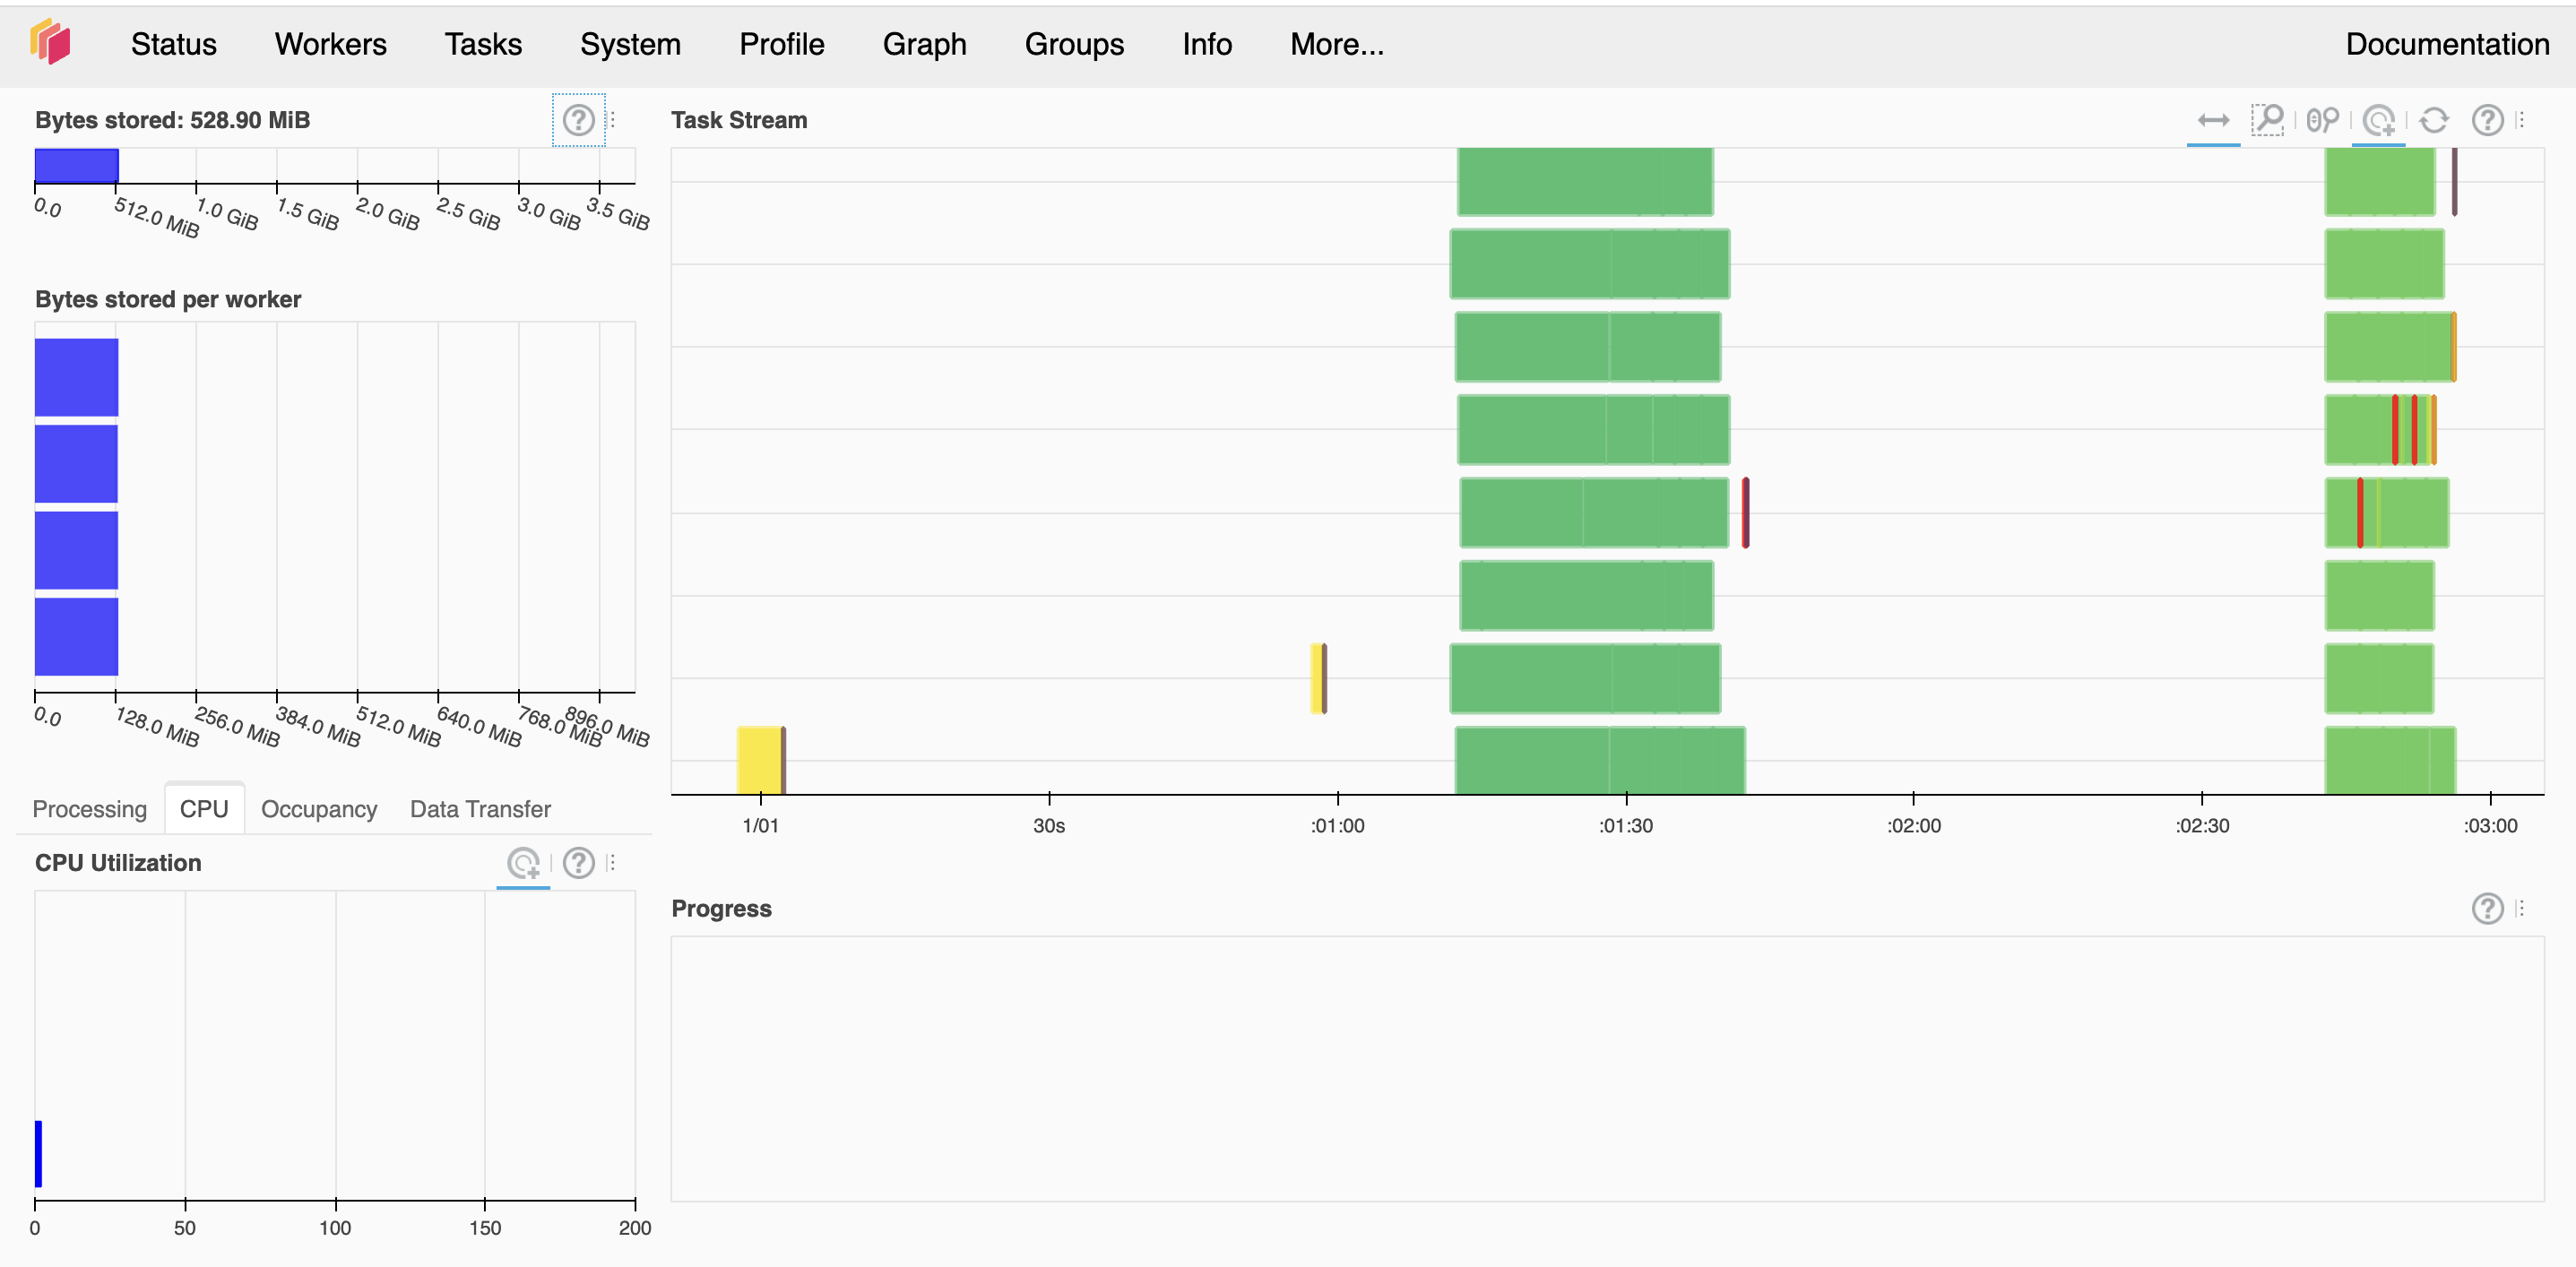

In [6]:
df = dd.read_csv("/home/work/PA3_DSE230/Airline_2016_2018.csv")

In [7]:
df = df[['OP_CARRIER_FL_NUM','OP_CARRIER', 'ORIGIN', 'DEST', 'AIR_TIME']]

In [8]:
df.head(10)

OP_CARRIER_FL_NUM OP_CARRIER ORIGIN DEST  AIR_TIME
0               1248         DL    DTW  LAX     249.0
1               1251         DL    ATL  GRR      92.0
2               1254         DL    LAX  ATL     207.0
3               1255         DL    SLC  ATL     173.0
4               1256         DL    BZN  MSP     121.0
5               1257         DL    ATL  BNA      38.0
6               1257         DL    BNA  ATL      37.0
7               1258         DL    ATL  JAX      45.0
8               1258         DL    JAX  ATL      43.0
9               1259         DL    ATL  OKC     116.0

In [9]:
df = df[df['OP_CARRIER_FL_NUM']<1255]


In [10]:
df.head()

OP_CARRIER_FL_NUM OP_CARRIER ORIGIN DEST  AIR_TIME
0                 1248         DL    DTW  LAX     249.0
1                 1251         DL    ATL  GRR      92.0
2                 1254         DL    LAX  ATL     207.0
673                  1         AS    DCA  SEA     298.0
674                  2         AS    SEA  DCA     287.0

#### WORKERS - Gives the CPU usage, memory usage and other metrics for each worker in the cluster.

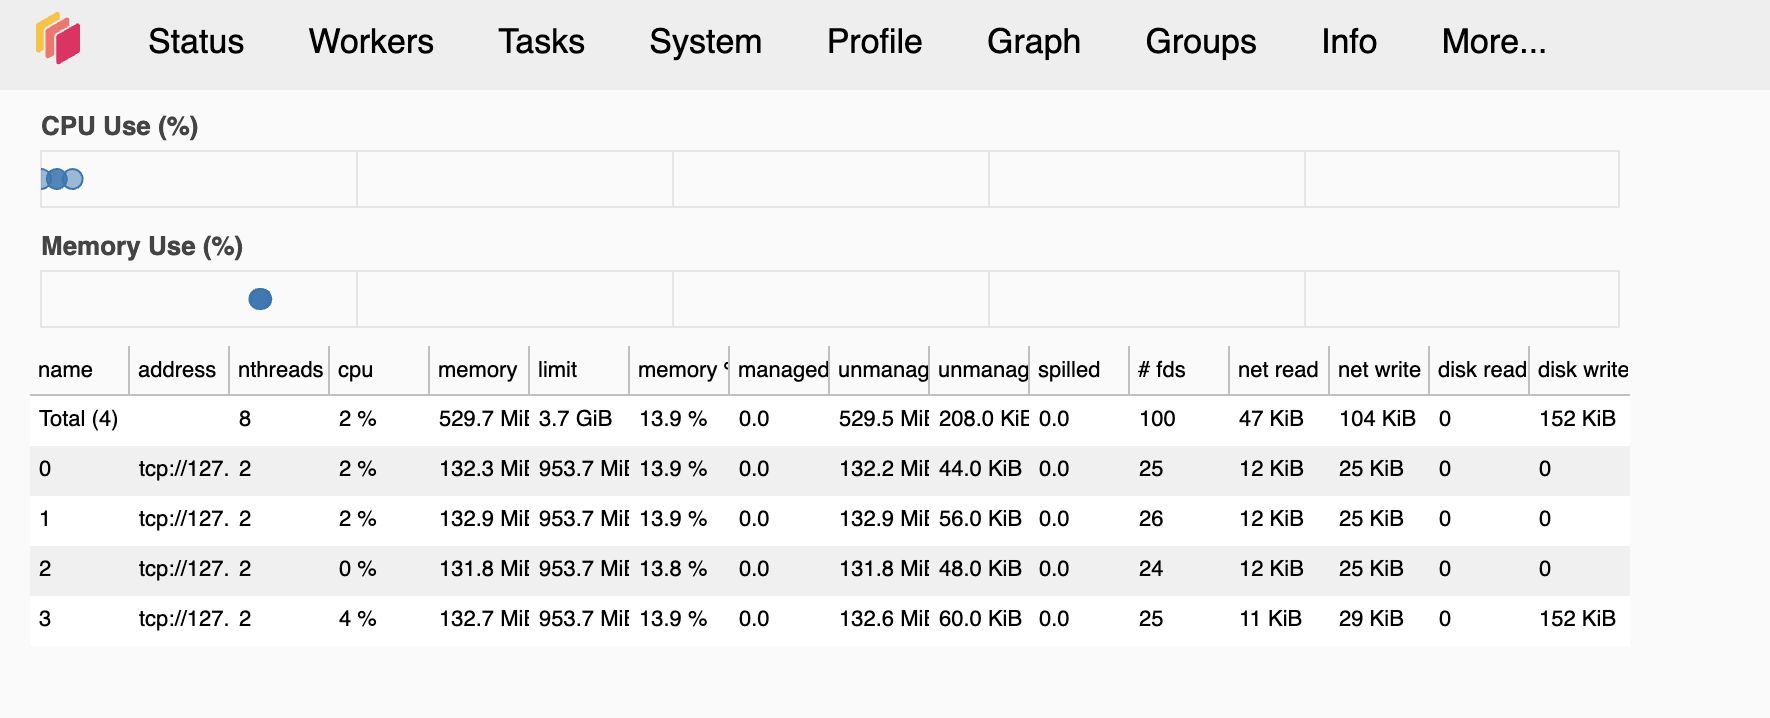

#### System Tab gives CPU, memory and bandwidth statistics for the cluster.

#### Tasks: This tab lists all of the tasks that are currently running in our cluster across the threads as Task Stream. For each task, it shows the task name/description

#### Profile: This tab displays profiling information for each task in the Dask cluster. Profiling is a technique used to measure the performance of a program by analyzing its execution behavior. This tab shows the execution time for each task in the cluster, allowing users to identify performance bottlenecks and optimize their code.

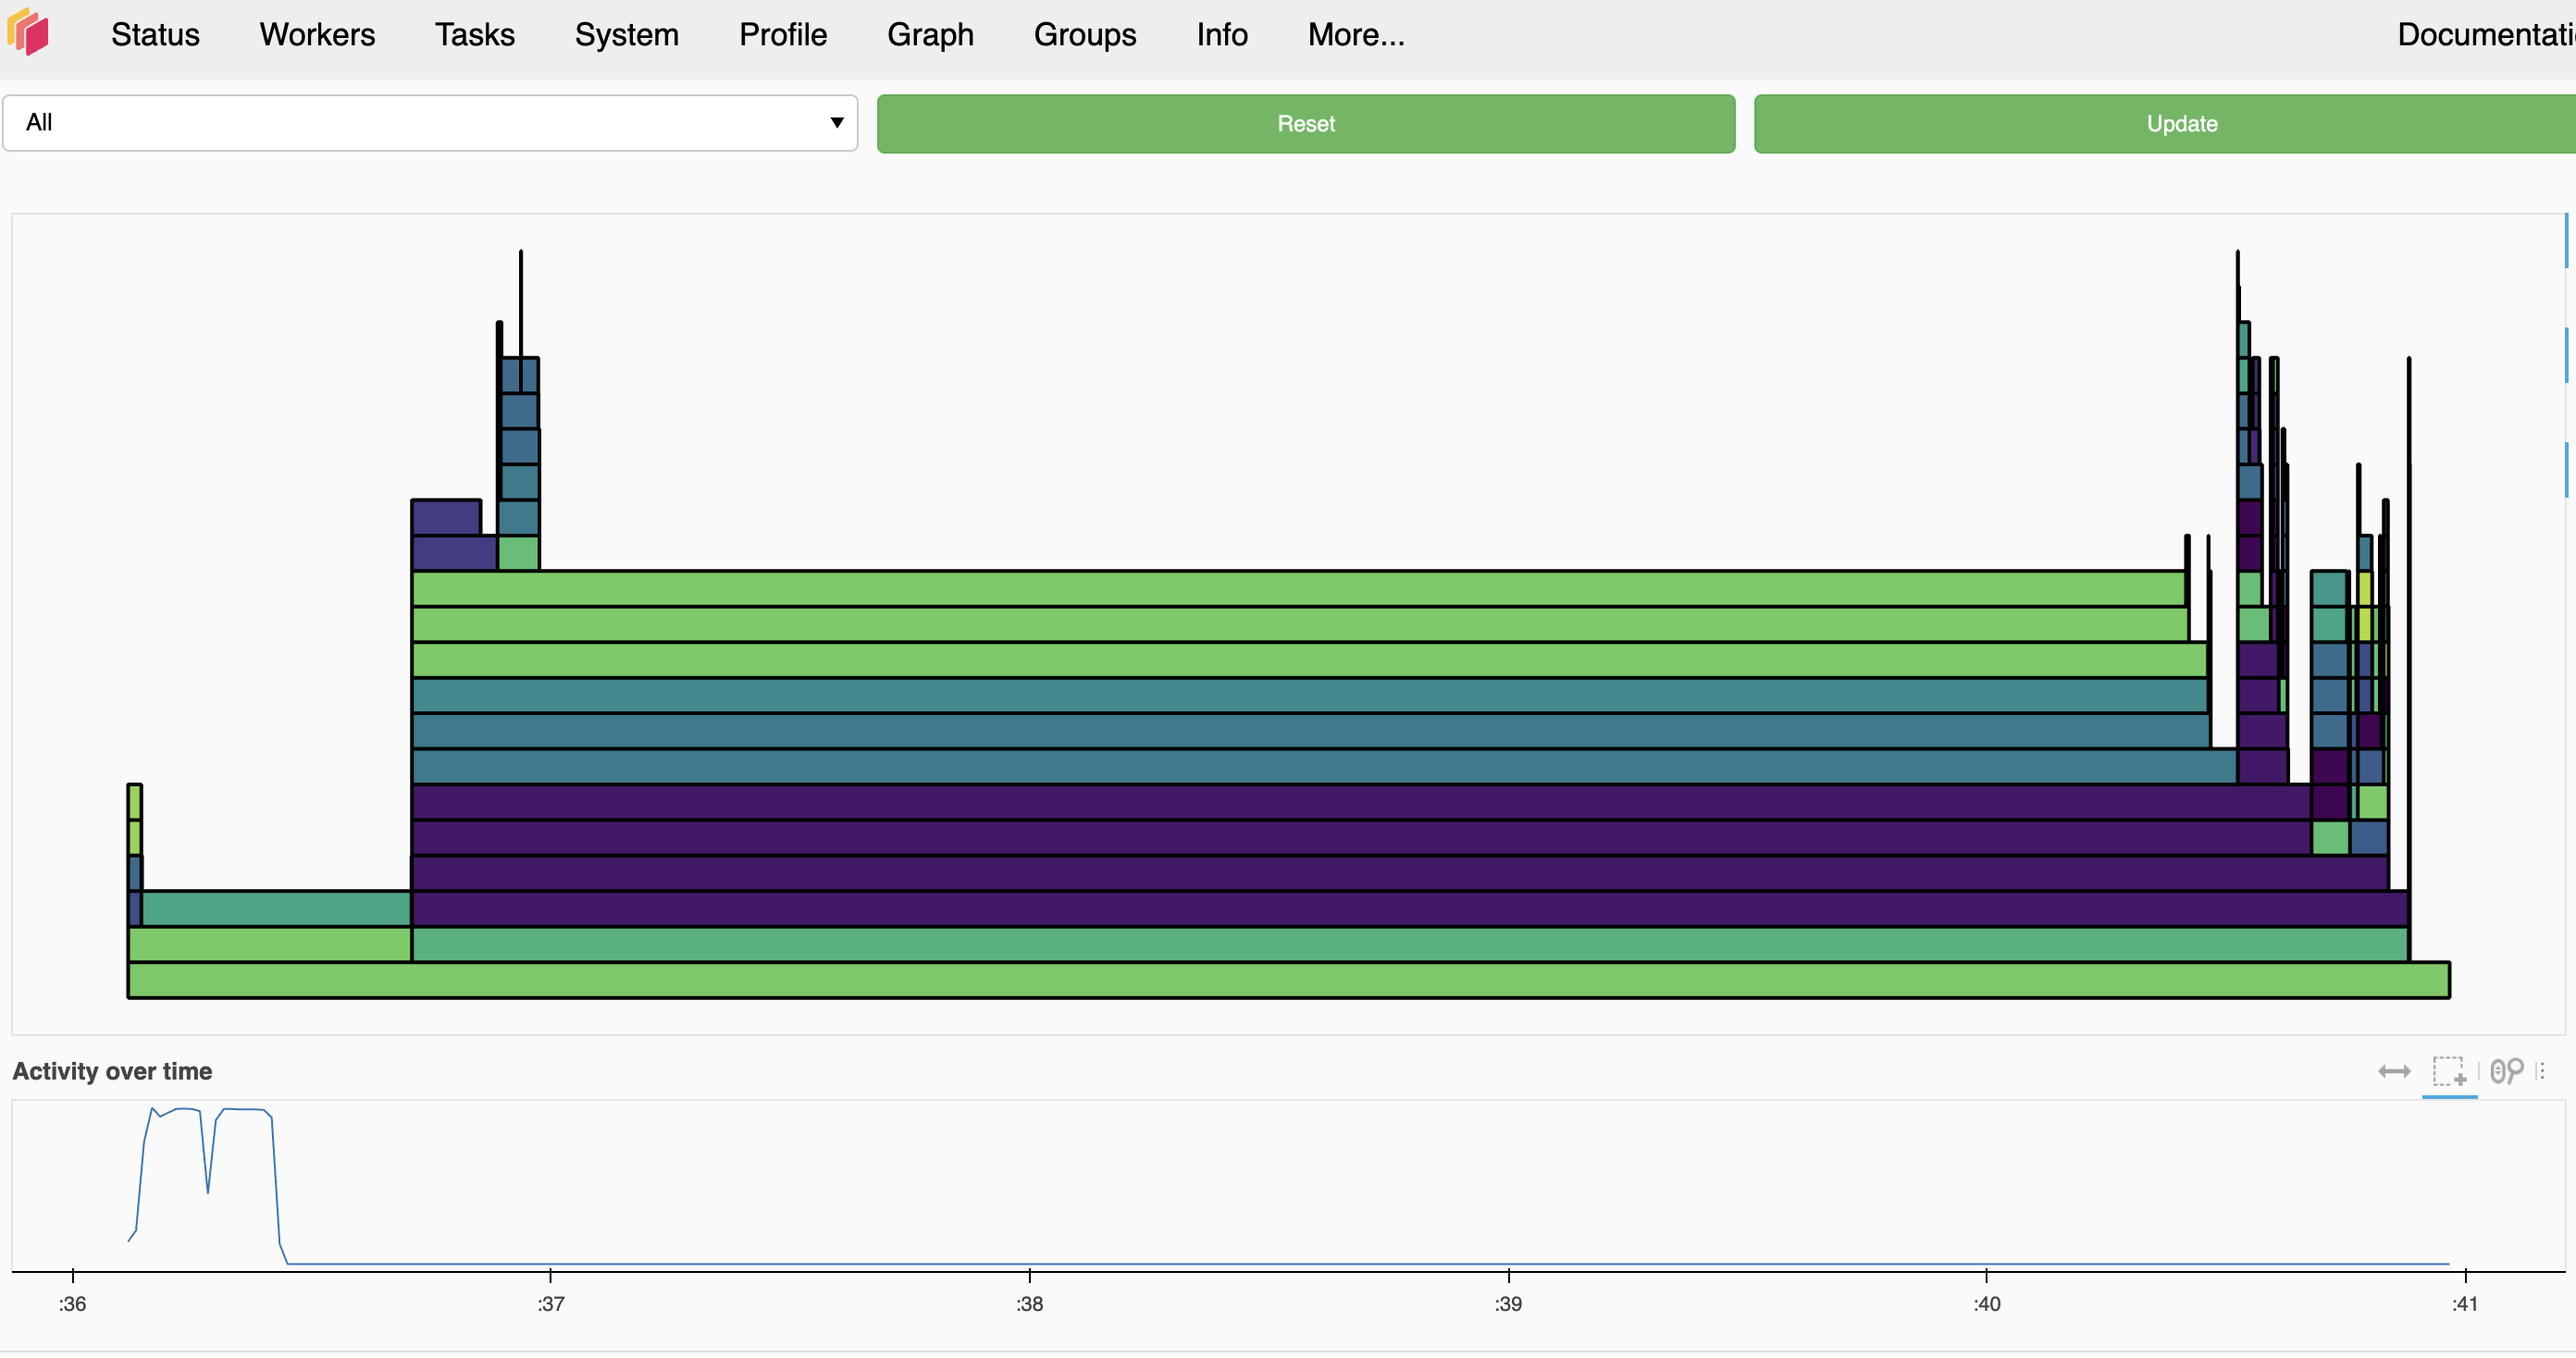

In [11]:
df.OP_CARRIER_FL_NUM.count().compute()

6625577

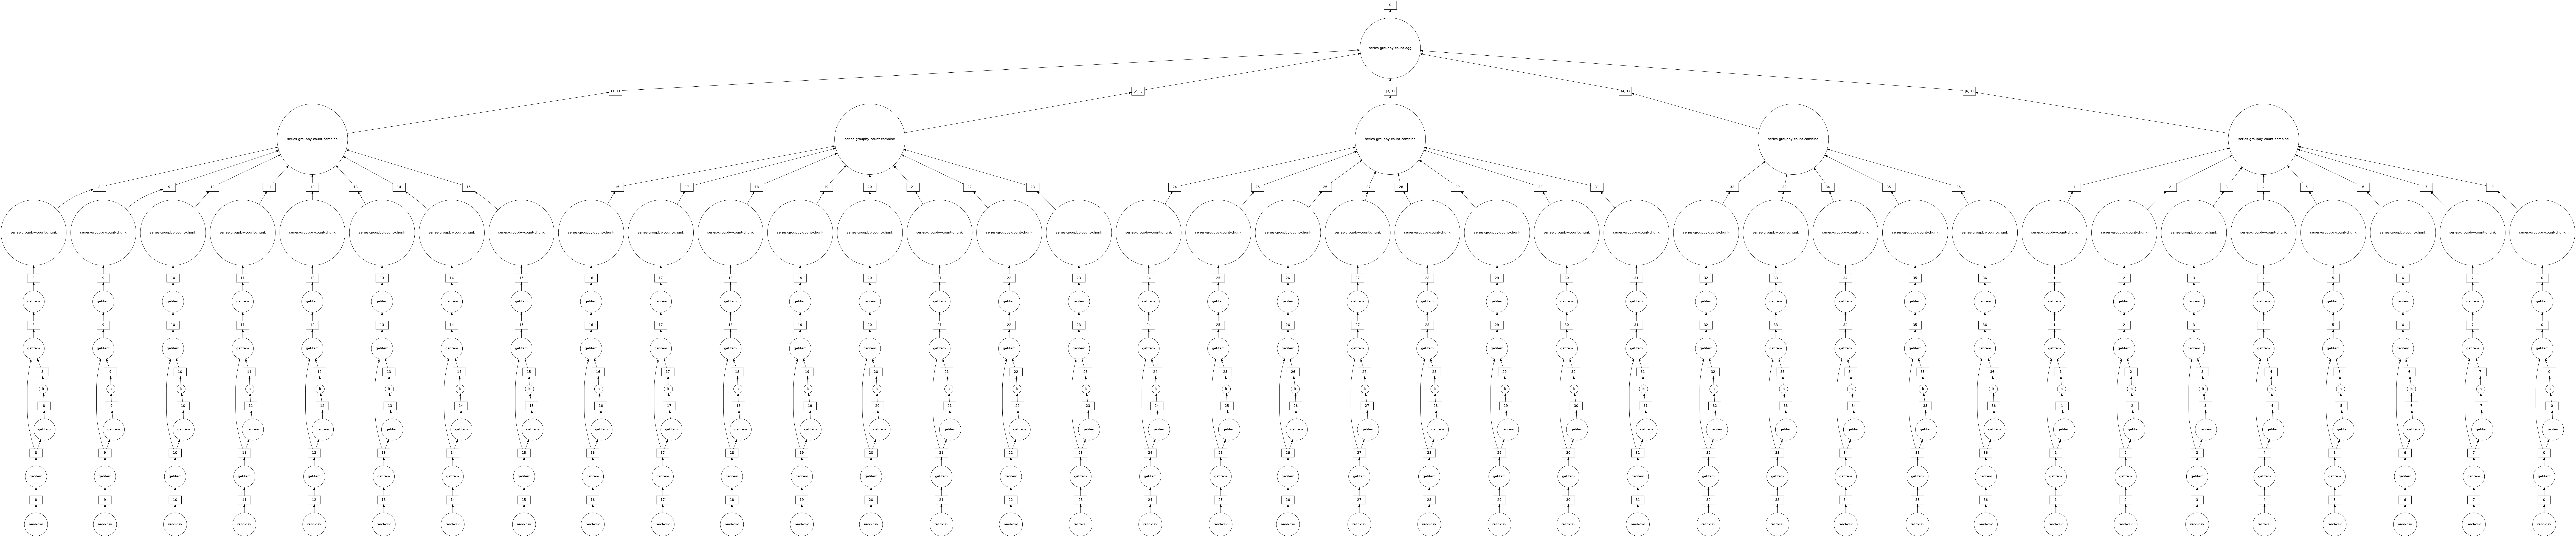

In [12]:
df.groupby('OP_CARRIER_FL_NUM').DEST.count().visualize()

In [13]:
df.groupby('OP_CARRIER_FL_NUM').DEST.count().compute()

OP_CARRIER_FL_NUM
1       6723
2       5539
3       6819
4       6823
5       5764
        ... 
1254    5690
911      161
1032     509
666       12
13        41
Name: DEST, Length: 1254, dtype: int64

#### GRAPH Tab- The graph view provides a visual representation of the computational graph that describes the dependencies between the different tasks in the computation. It allows us to explore the structure of the computation and identify any bottlenecks or areas of inefficiency.

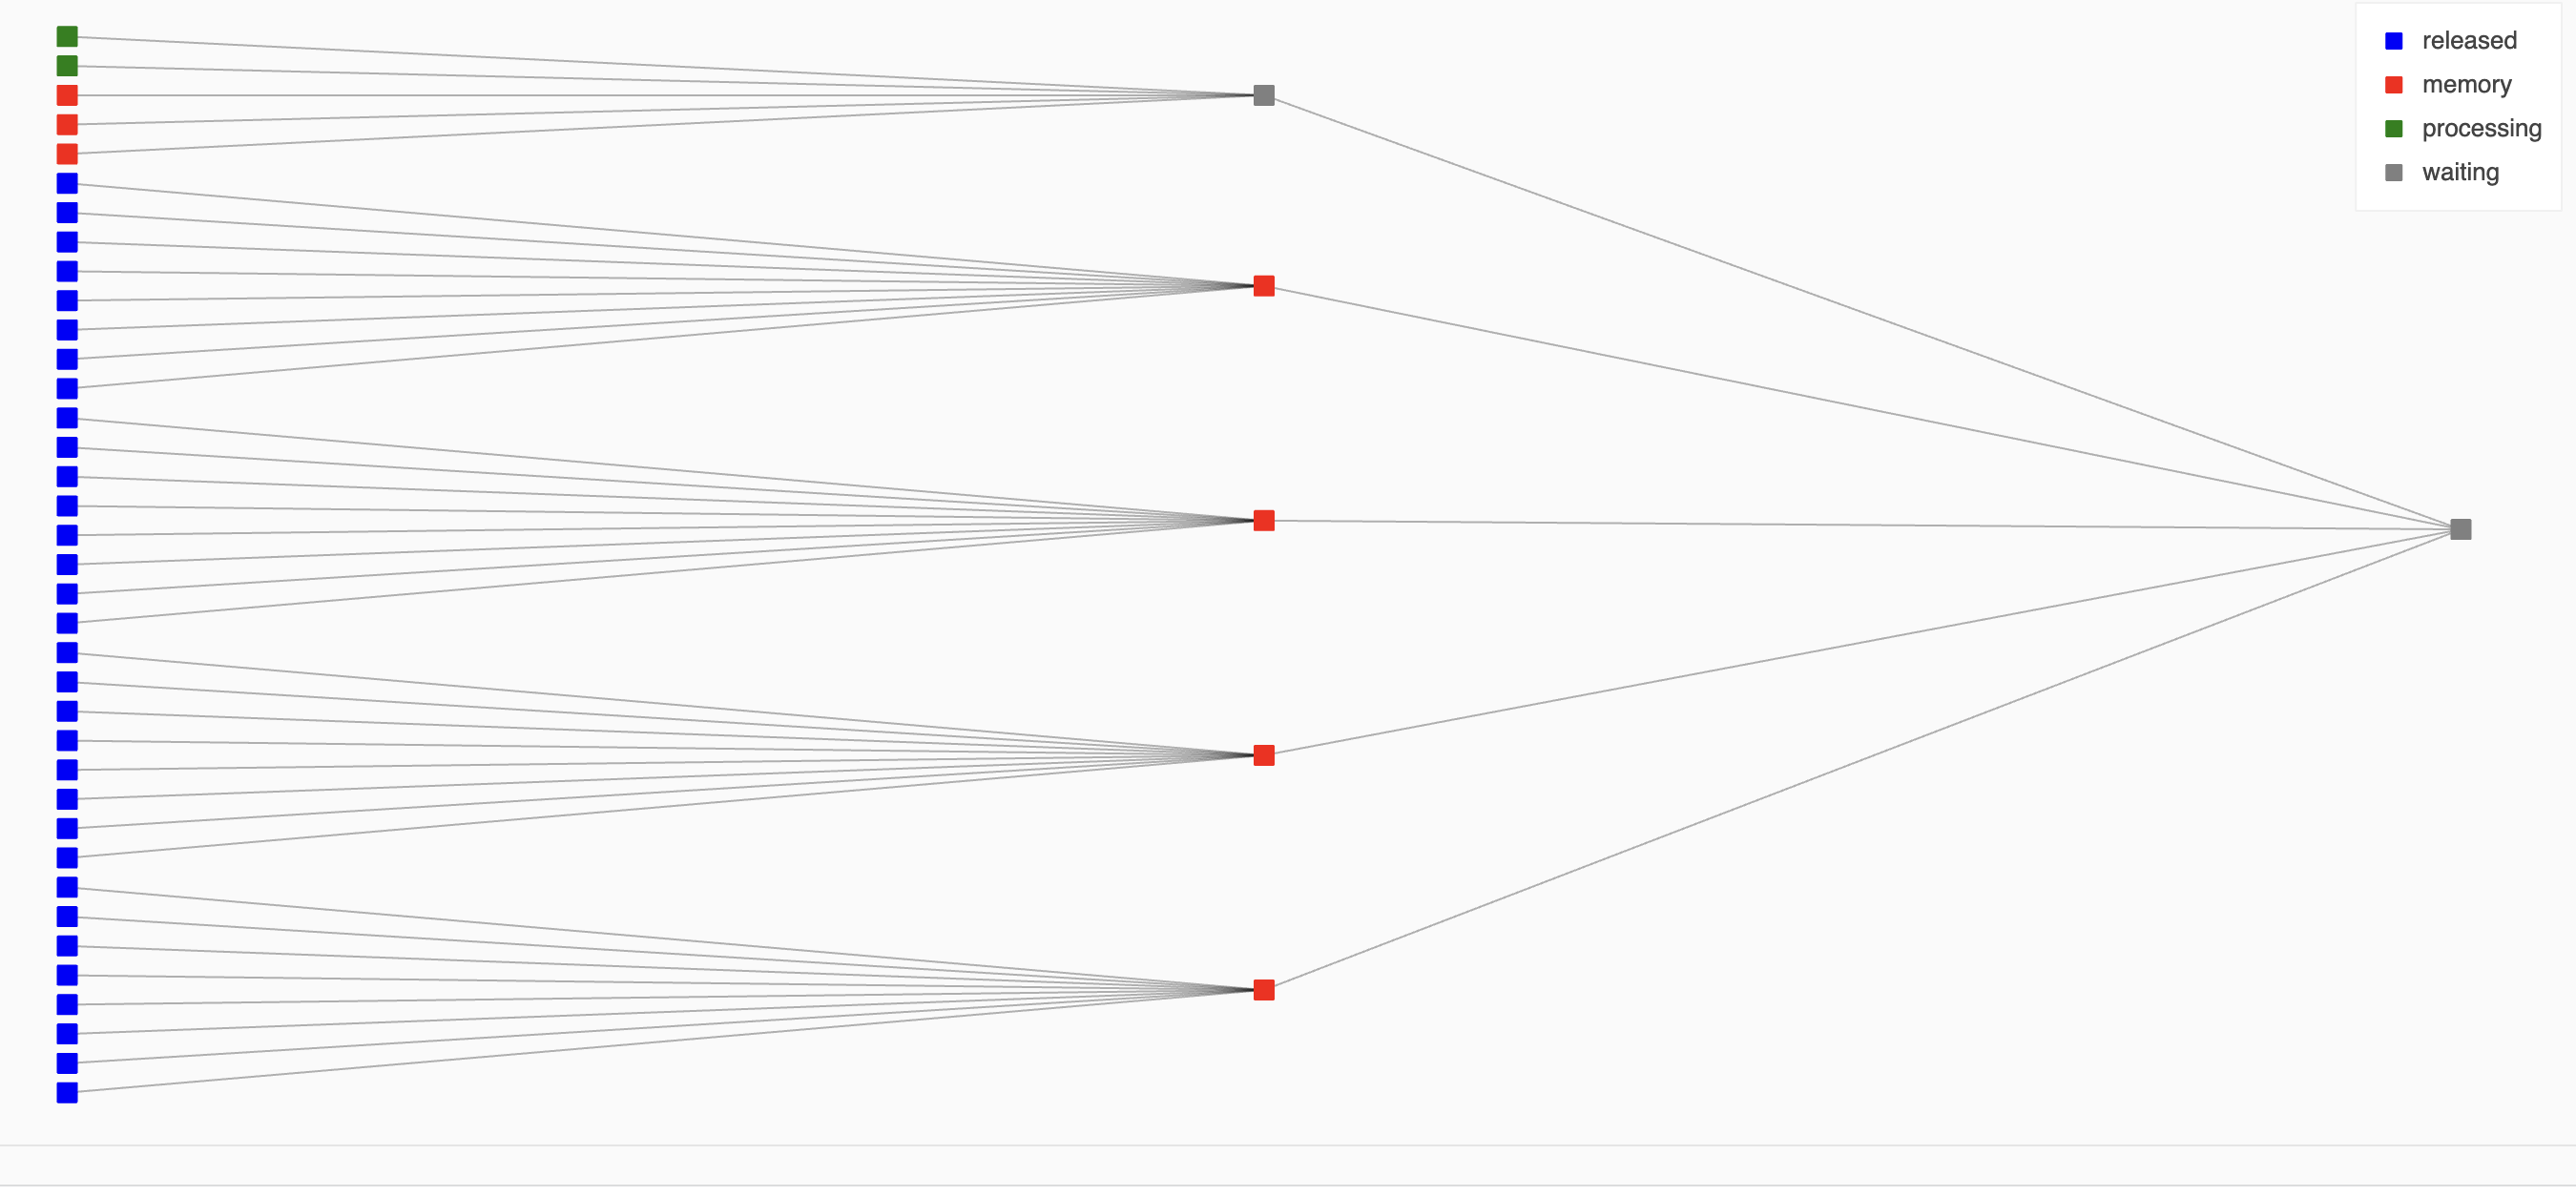

#### Groups Tab- This tab shows the task groups in the Dask cluster. A task group is a set of related tasks that are submitted together as a unit. This tab shows the progress of each task group, including the number of tasks completed and the total number of tasks in the group. It also shows the memory usage for the task group.

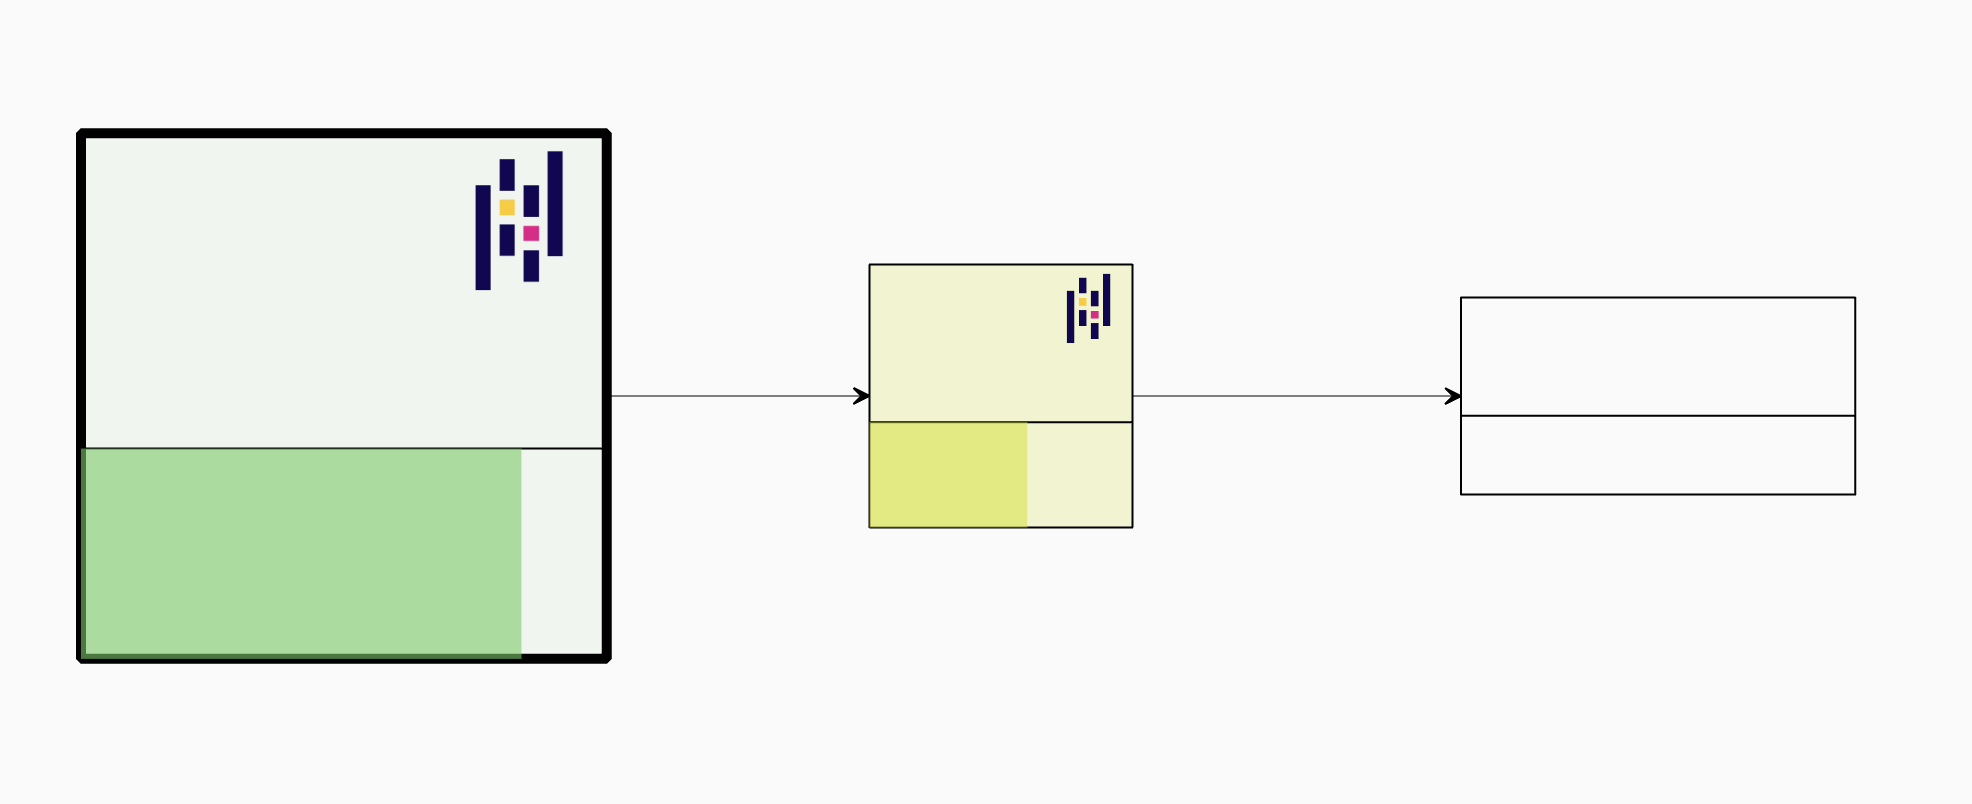

#### Info: This tab provides general information about the Dask cluster, such as the number of workers and the amount of memory and CPU available. It also shows the current status of each worker in the cluster, including its IP address, CPU usage, and memory usage.

#### We can find many more relevant metrics of interest provided by Dask UI under the 'More' Tabs.